<a href="https://colab.research.google.com/github/RomanGud/Module2/blob/main/%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_2_%D0%A1%D1%82%D0%BE%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_%D0%B0%D0%B2%D0%B8%D0%B0%D0%B1%D0%B8%D0%BB%D0%B5%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        ПРОГНОЗ СТОИМОСТИ АВИАБИЛЕТОВ      
    </h2>
    </div>

![](https://oir.mobi/uploads/posts/2020-04/1586428934_6-p-samoleti-na-posadke-11.jpg)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Цель исследования — проанализировать набор данных о бронировании авиарейсов и спрогнозировать стоимость авиабилетов.
<br>На цену авиабилета влияет ряд факторов, таких как продолжительность полета, дни, оставшиеся до вылета, время прибытия и время вылета и т.д. Цена может зависеть от различных факторов. Последние достижения в области искусственного интеллекта (ИИ) и машинного обучения (ML) позволяют выводить такие правила и моделировать изменение цен.
</p>

НАБОР ДАННЫХ
<br>Набор данных содержит информацию о вариантах бронирования авиабилетов. В наборе данных 300192 строк данных и 11 признаков.

Признаки:
1. airline: Название авиакомпании. Это категориальный признак.
2. flight: Код рейса самолета. Это категориальный признак.
3. source_city: Город отправления. Это категориальный признак.
4. departure_time: Время отправления. Онимеет 6 уникальных меток времени. Это категориальный признак.
5. stops: Остановки. Категориальный признак с 3 различными значениями, который хранит количество остановок между исходным и конечным городами.
6. arrival_time: Время прибытия. Он имеет шесть различных меток времени. Это категориальный признак. 
7. destination_city: Город назначения. Это категориальный признак.
8. class:	Класс билета.  Он имеет два различных значения: Бизнес и Эконом. Это категориальный признак.
9. duration : Продолжительность полета в часах. Числовой признак.
10. days_left	: Дни до вылета. Числовой признак.
11. price:  Стоимость билета. Целевая переменная. Числовой признак.

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


<b> Загружаем данные

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Price_Airline_Flight.csv')

**Посмотрим описание данных**

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**Находим повторяющиеся строки (дубликаты) и удаляем их. Удаляем ненужный признак "Unnamed: 0" совпадающий с номером строки.**

In [ ]:
# Количество повторяющихся строк (дубликатов)
df.duplicated().sum()

0

In [ ]:
# Удаляем столбец с порядковым номером строки
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
# проверяем количество дубликатов после удаления столбца
df.duplicated().sum()

39

In [ ]:
# удаление повторяющихся значений
df.drop_duplicates(inplace=True)

**Краткая информация о данных**

In [ ]:
# Краткая информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [ ]:
# Размер данных
df.shape

(300153, 11)

Распределение по типам данных:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


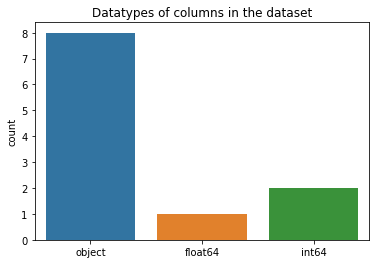

Count of the datatypes of columns
object     8
int64      2
float64    1
dtype: int64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df.dtypes)
plt.title("Datatypes of columns in the dataset")
plt.show()
print("Count of the datatypes of columns")
print(df.dtypes.value_counts())

Итого: категориальных признаков - 8, числовых - 3.

**Числовые признаки**

In [ ]:
# Статистическое описание данных
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Посмотрим зависимость между числовыми признаками на матрице корреляции:

In [ ]:
# Корелляция между числовыми признаками.
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


То же самое на тепловой карте:

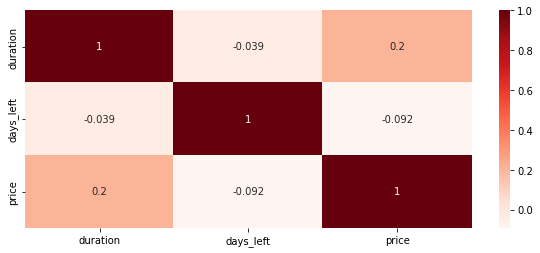

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

Можно сделать вывод, что чем больше длительность полета, тем больше стоимость билета и чем больше дней до вылета, тем стоимость билета меньше.

**Категориальные признаки**:

In [ ]:
# Статистическое описание данных категориальным признакам
df.describe(include=['object'])

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


**Распределение количества проданных билетов по авиакомпаниям:**

In [ ]:
# Количество проданных билетов по каждой авиакомпании
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

Самая популярная авиакомпания по количеству проданных билетов - **Vistara:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


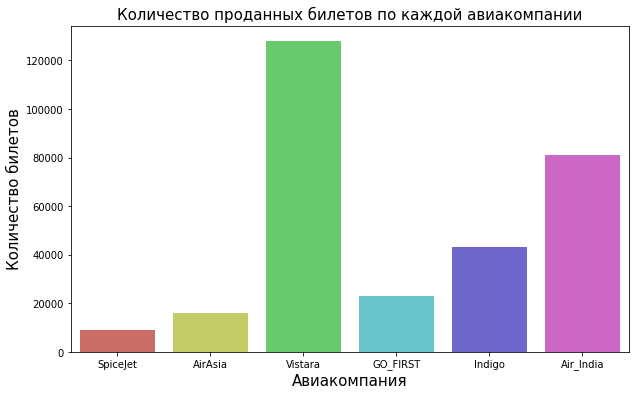

In [ ]:
# Построение графика
plt.figure(figsize=(10,6))
sns.countplot(df['airline'],palette='hls')
plt.title('Количество проданных билетов по каждой авиакомпании',fontsize=15)
plt.xlabel('Авиакомпания',fontsize=15)
plt.ylabel('Количество билетов',fontsize=15)
plt.show()

**Распределение количества наименований (кодов) авиарейсов по авиакомпаниям:**

In [ ]:
# Количество наименований авиарейсов
df.flight.nunique()

1561

In [ ]:
# Создаем датафрейм с группированием данных для признаков кода рейса и наименования компании с агрегированием по количеству
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

По количеству наименований авиарейсов лидирует авиакомпания **Indigo**:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


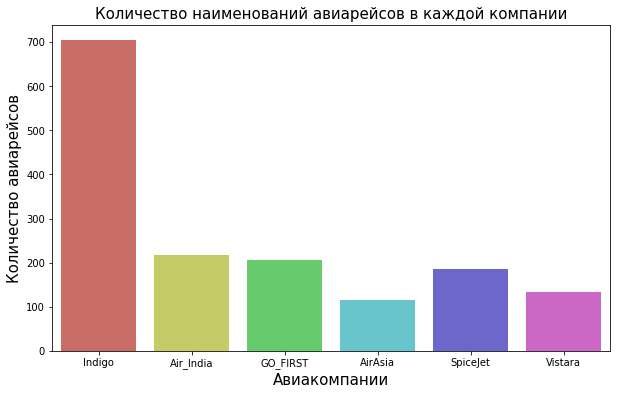

In [ ]:
# Строим график
plt.figure(figsize=(10,6))
sns.countplot(df1['airline'],palette='hls')
plt.title('Количество наименований авиарейсов в каждой компании',fontsize=15)
plt.xlabel('Авиакомпании',fontsize=15)
plt.ylabel('Количество авиарейсов',fontsize=15)
plt.show()

**Бизнес и Эконом класс билета**

In [ ]:
df2=df.groupby(['airline','class'],as_index=False).count()
# количество авиакомпаний в каждом классе
df2['class'].value_counts()

Economy     6
Business    2
Name: class, dtype: int64

In [ ]:
df3=df.groupby(['flight','airline','class'],as_index=False).count()
#количество рейсов (маршрутов) для каждого класса
df3['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

Бизнес класс имеют только две авиакомпании. Эконом класс - все авиакомпании.<br> Ниже график распределения количества наименований рейсов (маршрутов) по каждой компании с разделением на Бизнес и Эконом классы.

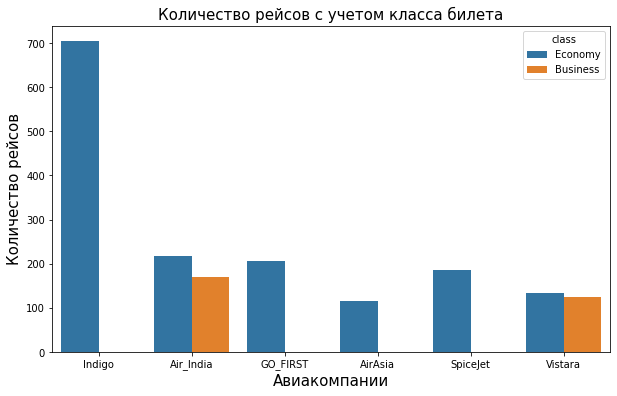

In [ ]:
# Строим график
plt.figure(figsize=(10,6))
sns.countplot(x ='airline', hue = "class", data = df3)
plt.title('Количество рейсов с учетом класса билета',fontsize=15)
plt.xlabel('Авиакомпании',fontsize=15)
plt.ylabel('Количество рейсов',fontsize=15)
plt.show()

Из графика видно, что Бизнес-класс имеют только компании Air_India и Vistara. Причем классы распределены в них примерно поровну.

Наиболее популярный - Эконом класс.

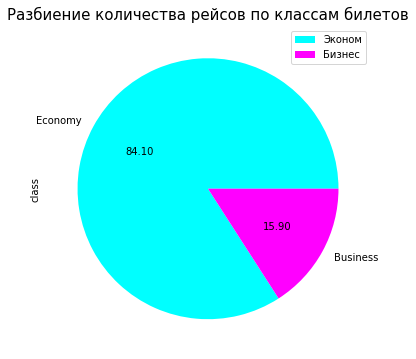

In [ ]:
plt.figure(figsize=(8,6))
df3['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Разбиение количества рейсов по классам билетов',fontsize=15)
plt.legend(['Эконом','Бизнес'])
plt.show()

**Изменяется ли цена в зависимости от авиакомпании?**

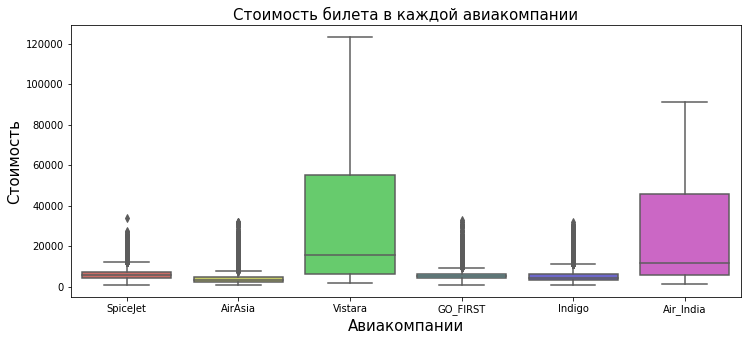

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Стоимость билета в каждой авиакомпании',fontsize=15)
plt.xlabel('Авиакомпании',fontsize=15)
plt.ylabel('Стоимость',fontsize=15)
plt.show()

Видно, что авиакомпания Vistara имеет максимальный ценовой диапазон.

Авиакомпании Vistara и Air_India имеют примерно одинаковые максимальные цены и существенно выше других авиакомпаний. Отрыв от других компаний обусловлен наличием Бизнес-класса.

Остальные авиакомпании имеют примерно одинаковые низкие цены.

**Стоимость билета в Эконом- и Бизнес-классах.**

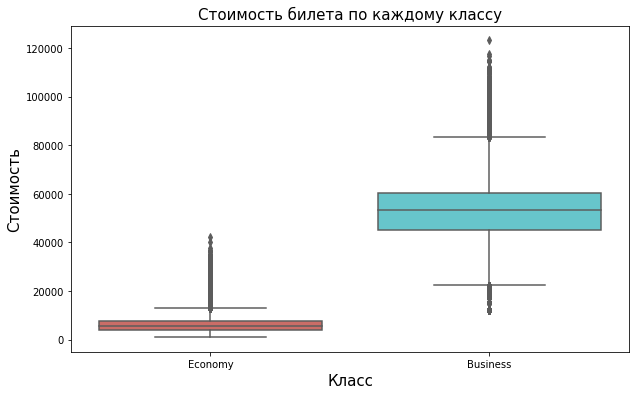

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Стоимость билета по каждому классу',fontsize=15)
plt.xlabel('Класс',fontsize=15)
plt.ylabel('Стоимость',fontsize=15)
plt.show()

Стоимость билета является максимальной для Бизнес-класса по сравнению с Эконом-классом

**Посмотрим как меняется стоимость билета в зависимости от количества промежуточных посадок.**

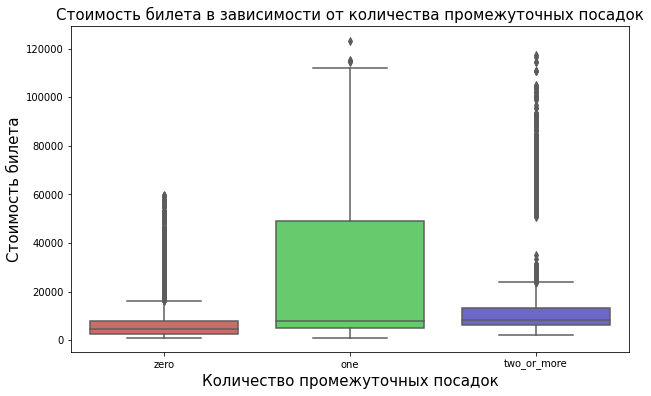

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Стоимость билета в зависимости от количества промежуточных посадок',fontsize=15)
plt.xlabel('Количество промежуточных посадок',fontsize=15)
plt.ylabel('Стоимость билета',fontsize=15)
plt.show()

Мы видим, что рейсы с одной остановкой имеют максимальную стоимость билета.

**Как меняется Цена билета в зависимости от Времени вылета и Прибытия?**

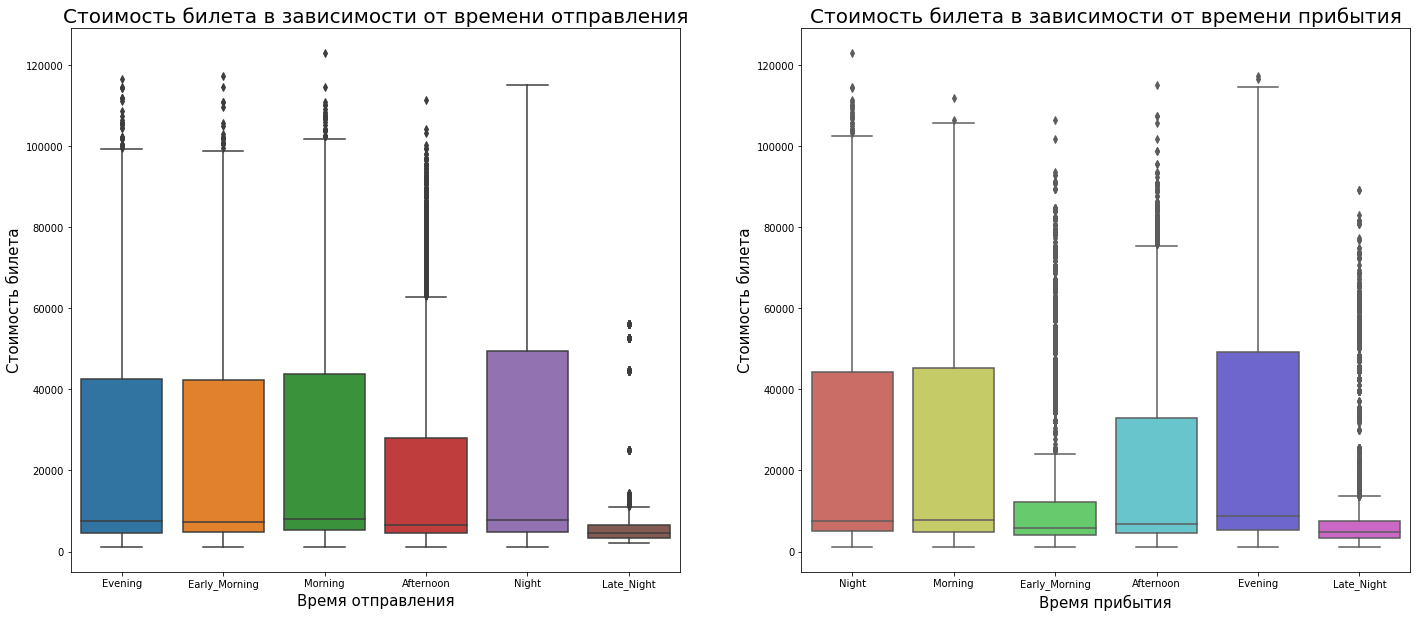

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Стоимость билета в зависимости от времени отправления',fontsize=20)
plt.xlabel('Время отправления',fontsize=15)
plt.ylabel('Стоимость билета',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Стоимость билета в зависимости от времени прибытия',fontsize=20)
plt.xlabel('Время прибытия',fontsize=15)
plt.ylabel('Стоимость билета',fontsize=15)
plt.show()

1. Стоимость билета выше на рейсы, когда время вылета приходится на ночное время.<br>
Стоимость билета практически одинакова для рейсов с вылетом ранним утром, утром и вечером.<br>
Стоимость бела с вылетом в обед значительно ниже.<br>
Существенное снижение в разы стоимости билета наблюдается на рейсы с вылетом в конце ночи.<br>
2. Стоимость билета выше на рейсы, когда время прибытия приходится на вечернее время.<br>
Стоимость билета практически одинакова для рейсов, время прибытия которых приходится на утро и ночь. <br>
Также как и для времени вылета существенное снижение в разы стоимости билета наблюдается на рейсы, время прибытия которых в конце ночи.

**Как меняется цена при изменении города отправления и города назначения?**

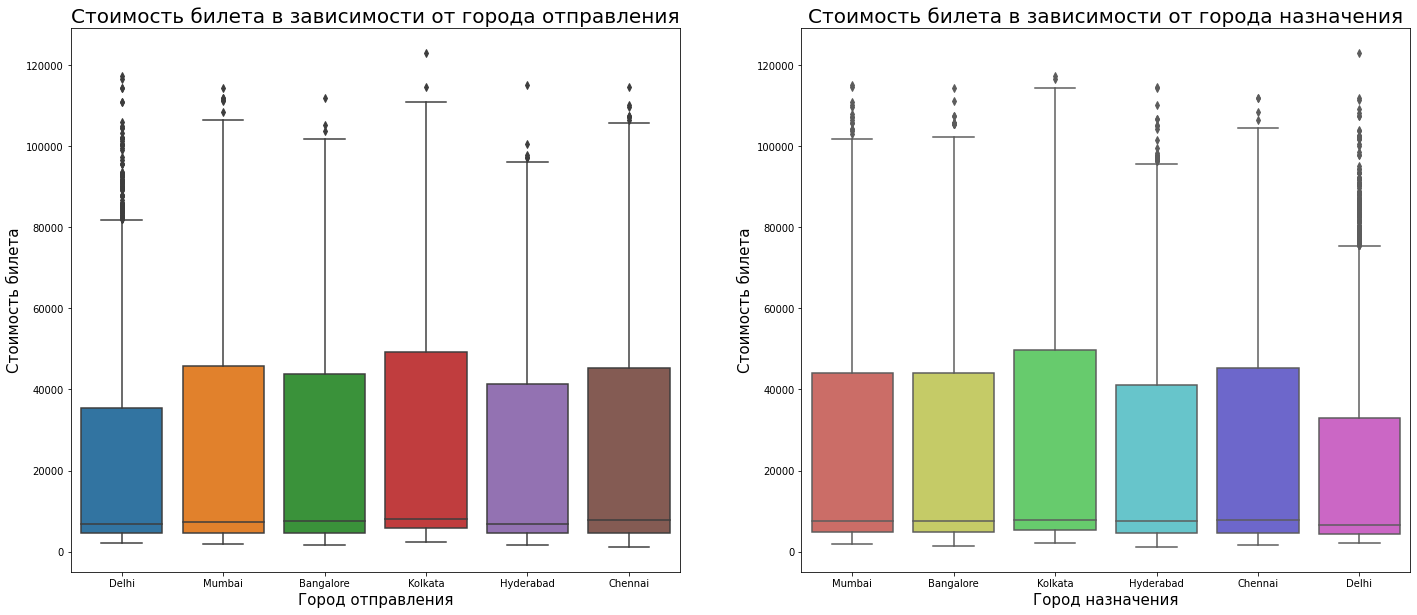

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Стоимость билета в зависимости от города отправления',fontsize=20)
plt.xlabel('Город отправления',fontsize=15)
plt.ylabel('Стоимость билета',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Стоимость билета в зависимости от города назначения',fontsize=20)
plt.xlabel('Город назначения',fontsize=15)
plt.ylabel('Стоимость билета',fontsize=15)
plt.show()

1. Зависимость стоимости билета от города отправления.<br>
Стоимость билета выше на рейсы, отправным городом которых является Калькутта.<br>
Цена билета почти одинакова на рейсы из таких городов-отправителей, как Мумбаи и Ченнаи, Хайдарабад и Бангалор.<br>
Цена билета низкая на рейсы с таким городом отправления, как Дели.
2. Зависимость стоимости билета от города назначения.<br>
Стоимость билета выше на рейсы, городами назначения которых являются Калькутта и Ченнаи.<br>
Стоимость билета практически одинакова для рейсов с такими городами назначения, как Мумбаи и Бангалор.<br>
Цена билета низкая на Рейсы с таким городом назначения, как Дели.

**Как изменяется цена в зависимости от продолжительности полета для каждога класа?**

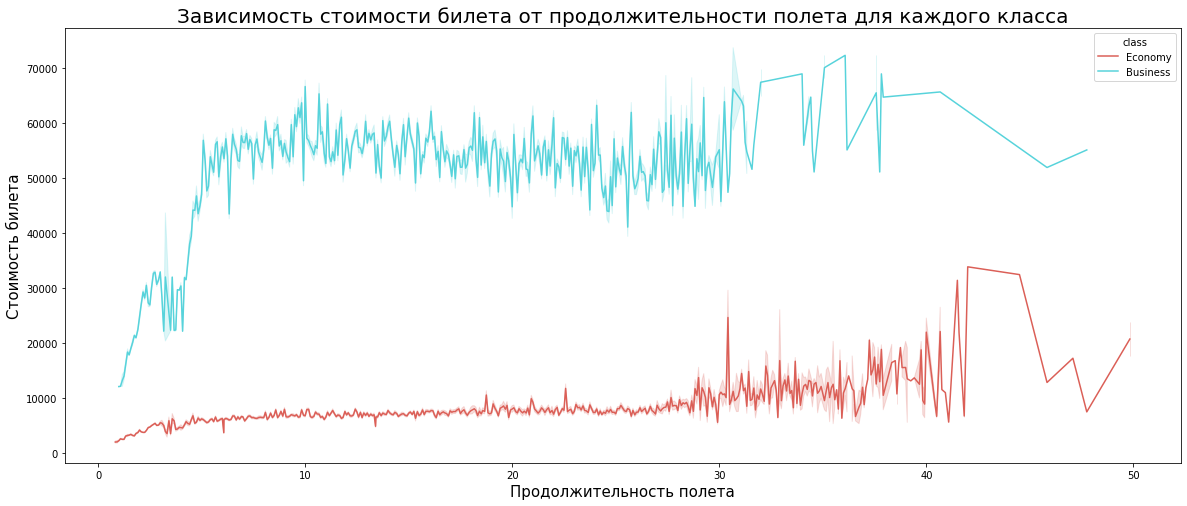

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Зависимость стоимости билета от продолжительности полета для каждого класса',fontsize=20)
plt.xlabel('Продолжительность полета',fontsize=15)
plt.ylabel('Стоимость билета',fontsize=15)
plt.show()

На графике видно что, для Бизнес-класса с увеличением продолжительности полета до 5 часов стоимость билета резко увеличивается. Далее после 10 часов полета стоимость примерно одинаковая (т.к. увеличивается количество промежуточных посадок, что компенсирует увеличение стоимости билета. В Эконом-классе наблюдается не такое резкое увеличение стоимости до 5 часов полета.

<p>
    <b> Как влияет на цену количество дней, оставшихся до вылета?</b>
    
<li> Ниже мы видим по сравнению с другими, когда до вылета остается два дня, цена билета очень высока для всех авиакомпаний</li>
    
</p>

**Влияние количества дней, оставшихся до вылета на стоимость билета.**

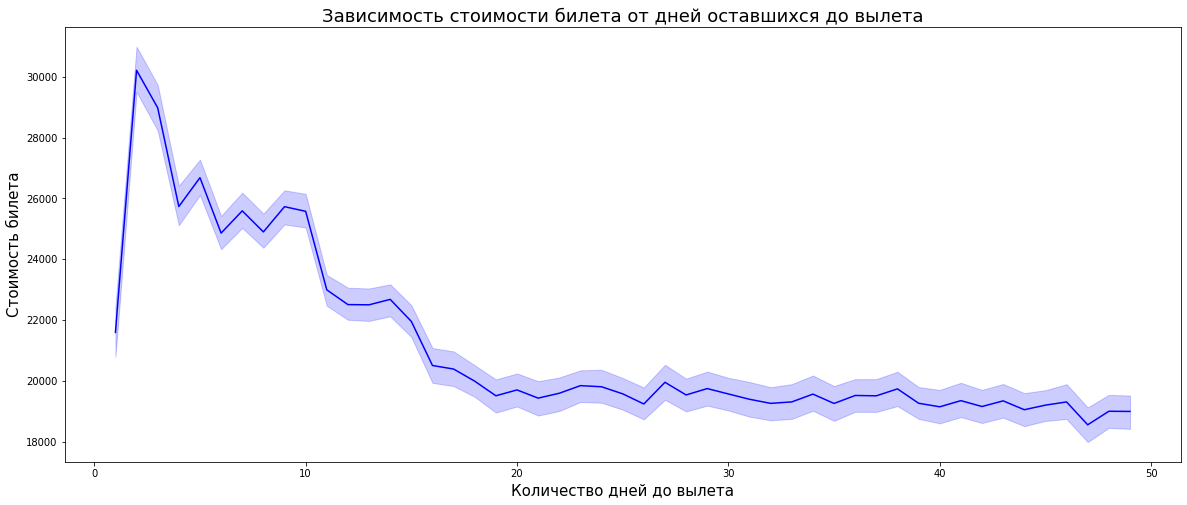

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Зависимость стоимости билета от дней оставшихся до вылета',fontsize=18)
plt.xlabel('Количество дней до вылета',fontsize=15)
plt.ylabel('Стоимость билета',fontsize=15)
plt.show()

Стоимость билета высока, когда до вылета остается два дня.

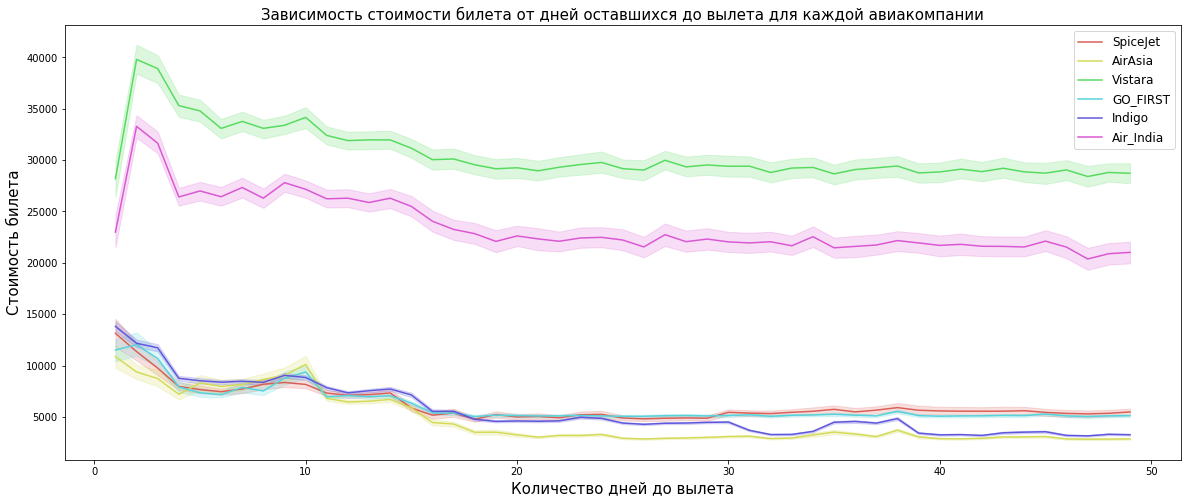

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Зависимость стоимости билета от дней оставшихся до вылета для каждой авиакомпании',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Количество дней до вылета',fontsize=15)
plt.ylabel('Стоимость билета',fontsize=15)
plt.show()

Из графика видно, что для компаний Vistara и Air_India, имеющих Бизнес-класс стоимость билета высока только за два дня до вылета. Для остальных компаний стоимость снижается с увеличением количества дней до вылета.

<b>Общее количество рейсов из одного города в другой</b>

In [ ]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


**Средняя стоимость авиабилетов разных авиакомпаний из города отправления в город назначения**

In [ ]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


**Подготовка данных для обучения моделей**

In [ ]:
# Создание файла резервной копии
df_back=df.copy()

In [ ]:
# Преобразование категориальных признаков в числовую форму с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [ ]:
# сохранение зависимых переменных в X и независимой переменной в Y
x=df.drop(['price'],axis=1)
y=df['price']

In [ ]:
# Разделение данных на обучающий набор и тестовый набор
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [ ]:
# Масштабирование значений признаков для обучения моделей
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

# **Модели регрессии**

Модели на основе **1. LinearRegression, 2. DecisionTreeRegressor, 3. BaggingRegressor, 4. RandomForestRegressor, 5. KNeighborsRegressor, 6. ExtraTreesRegressor, 7. Ridge Regression, 7. Lasso Regression, 9. GradientBoostingRegressor, 10. XGBRegressor, 11. CatBoostRegressor**

In [ ]:
# создаем словарь с именем модели и именами метрик качества модели
name_metric={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
# на основе словаря создаем датафрейм
Results=pd.DataFrame(name_metric)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [ ]:
# Импортируем необходимые регрессионные библиотеки/модули
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

In [ ]:
# Создание объектов моделей
model_LR = LinearRegression()
model_DTR = DecisionTreeRegressor()
model_BR = BaggingRegressor()
model_RFR = RandomForestRegressor()
model_KNR = KNeighborsRegressor(n_neighbors=5)
model_ETR = ExtraTreesRegressor()
model_Ridge = Ridge()
model_LML = linear_model.Lasso(alpha=0.1)
model_GBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
model_XGB = xgb.XGBRegressor()
model_CB = CatBoostRegressor()

In [ ]:
N_Models = [model_LR, model_DTR, model_BR, model_RFR, model_KNR, model_ETR, model_Ridge, model_LML, model_GBR, model_XGB, model_CB]

for model in N_Models:
    # Обучение модели
    model.fit(x_train, y_train)
    # Прогнозирование модели на тестовых данных
    y_pred = model.predict(x_test)
    # Выводим название модели
    print('Model Name: ', model)
    # Оценочные показатели для регрессионного анализа
    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Функция для вычисления MAPE - cредняя абсолютная ошибка в процентах
    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Вычисляем MAPE
    res_mape = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(res_mape, 2), '%')
    
    # Вычисляем Adjusted R squared - скорректированный R-квадрат
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : model,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : res_mape,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1267.827
Mean Squared Error (MSE): 13899409.543
Root Mean Squared Error (RMSE): 3728.191
R2_score: 0.972993
Root Mean Squared Log Error (RMSLE): 8.224
Mean Absolute Percentage Error (MAPE): 8.61 %
Adj R Square:  0.972992
------------------------------------------------------------------------------------------------------------
Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 1206.027
Mean Squared Error (MSE): 8854151.036
Root Mean Squared Error (RMSE): 2975.593
R2_score: 0.982796
Root Mean Squared Log Error (RMSLE): 7.998
Mean Ab

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Model Name:  GradientBoostingRegressor(loss='ls')
Mean Absolute Error (MAE): 2808.07
Mean Squared Error (MSE): 22221135.529
Root Mean Squared Error (RMSE): 4713.93
R2_score: 0.956824
Root Mean Squared Log Error (RMSLE): 8.458
Mean Absolute Percentage Error (MAPE): 20.67 %
Adj R Square:  0.956823
------------------------------------------------------------------------------------------------------------
[05:56:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Name:  XGBRegressor()
Mean Absolute Error (MAE): 2807.156
Mean Squared Error (MSE): 22226682.317
Root Mean Squared Error (RMSE): 4714.518
R2_score: 0.956813
Root Mean Squared Log Error (RMSLE): 8.458
Mean Absolute Percentage Error (MAPE): 20.67 %
Adj R Square:  0.956812
------------------------------------------------------------------------------------------------------------
Learning rate set to 0.095307
0:	learn: 20685.3460738	total: 89.9ms	remaining: 1m

Таблица метрик оценки моделей:

In [ ]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4630.295614,0.904653,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
1,DecisionTreeRegressor(),1267.827397,0.972992,3728.191189,8.605616,1.389941e+07,8.223678,0.972993
2,(DecisionTreeRegressor(random_state=1764684649...,1206.027484,0.982795,2975.592552,8.229497,8.854151e+06,7.998198,0.982796
3,"(DecisionTreeRegressor(max_features='auto', ra...",1171.705114,0.983989,2870.515043,7.910286,8.239857e+06,7.962247,0.983990
4,KNeighborsRegressor(),1853.746812,0.971657,3819.270820,11.109409,1.458683e+07,8.247815,0.971658
5,"(ExtraTreeRegressor(random_state=637879825), E...",1143.837615,0.984823,2794.702253,7.618108,7.810361e+06,7.935481,0.984824
6,Ridge(),4630.313301,0.904653,7005.011583,43.888754,4.907019e+07,8.854381,0.904656
7,Lasso(alpha=0.1),4630.179207,0.904653,7005.006183,43.885459,4.907011e+07,8.854380,0.904656
8,([DecisionTreeRegressor(criterion='friedman_ms...,2808.069729,0.956823,4713.929945,20.673000,2.222114e+07,8.458277,0.956824
9,XGBRegressor(),2807.156262,0.956812,4714.518249,20.667641,2.222668e+07,8.458402,0.956813


Изменяем имена моделей на интерпретируемые и упорядочиваем по значению **Adjusted R squared** (скорректированный R-квадрат):

In [ ]:
# создаем список имен моделей
models=['LinearRegression','DecisionTreeRegressor','BaggingRegressor','RandomForestRegressor','KNeighborsRegressor',
        'ExtraTreesRegressor','Ridge Regression','Lasso Regression','GradientBoostingRegressor','XGBRegressor', 'CatBoostRegressor']
# создаем датафрейм на основе списка и добаляем в него столбцы метрик
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
# сортируем данные по признаку Adj_R_Square 
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.984823,1143.837615,2794.702253,7.618108,7.810361e+06,7.935481,0.984824
1,RandomForestRegressor,0.983989,1171.705114,2870.515043,7.910286,8.239857e+06,7.962247,0.983990
2,BaggingRegressor,0.982795,1206.027484,2975.592552,8.229497,8.854151e+06,7.998198,0.982796
3,CatBoostRegressor,0.978491,1821.073723,3327.053803,14.152182,1.106929e+07,8.109842,0.978492
4,DecisionTreeRegressor,0.972992,1267.827397,3728.191189,8.605616,1.389941e+07,8.223678,0.972993
5,KNeighborsRegressor,0.971657,1853.746812,3819.270820,11.109409,1.458683e+07,8.247815,0.971658
6,GradientBoostingRegressor,0.956823,2808.069729,4713.929945,20.673000,2.222114e+07,8.458277,0.956824
7,XGBRegressor,0.956812,2807.156262,4714.518249,20.667641,2.222668e+07,8.458402,0.956813
8,LinearRegression,0.904653,4630.295614,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
9,Ridge Regression,0.904653,4630.313301,7005.011583,43.888754,4.907019e+07,8.854381,0.904656


<p> Исходя из приведенных выше сравнениий значений метрик оценки моделей выделяем лучшие три модели: <br>
    
1. <b>ExtraTreesRegressor</b>
2. <b>RandomForestRegressor</b>
3. <b>Bagging Regressor</b><br>

<p>Обучение и прогнозирование модели с помощью лучшей модели <b>ExtraTreesRegressor:</b></p>
</p>

In [ ]:
# Обучение модели
model_ETR.fit(x_train, y_train)
    
# Прогнозирование модели на тестовых данных
y_pred = model_ETR.predict(x_test)

In [ ]:
# создаем датафрейм со столбцами Price_actual и Price_pred
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
# добавляем новые столбцы в сохраненную копию основного дата-фрейма
result=df_back.merge(out,left_index=True,right_index=True)

In [ ]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
36773,Air_India,AI-485,Delhi,Early_Morning,one,Morning,Chennai,Economy,29.50,12,19123,19123,19237.83
115900,Air_India,AI-610,Bangalore,Evening,one,Early_Morning,Chennai,Economy,12.17,6,10744,10744,10992.41
65327,SpiceJet,SG-923,Mumbai,Afternoon,one,Night,Kolkata,Economy,6.58,23,5774,5774,5495.23
118247,Air_India,AI-9501,Bangalore,Early_Morning,two_or_more,Early_Morning,Chennai,Economy,24.08,33,6220,6220,6005.96
102847,GO_FIRST,G8-312,Bangalore,Evening,one,Early_Morning,Kolkata,Economy,14.25,2,12107,12107,6102.91
196301,AirAsia,I5-1229,Chennai,Evening,zero,Evening,Bangalore,Economy,0.92,33,1443,1443,1443.00
214586,Vistara,UK-977,Delhi,Evening,one,Morning,Bangalore,Business,13.83,33,57017,57017,59939.08
131964,Vistara,UK-720,Kolkata,Early_Morning,one,Afternoon,Mumbai,Economy,5.42,29,6067,6067,6066.45
106667,Vistara,UK-866,Bangalore,Night,one,Morning,Kolkata,Economy,12.00,29,6534,6534,6630.09
213693,Air_India,AI-441,Delhi,Evening,one,Evening,Bangalore,Business,24.67,23,42457,42457,42609.40


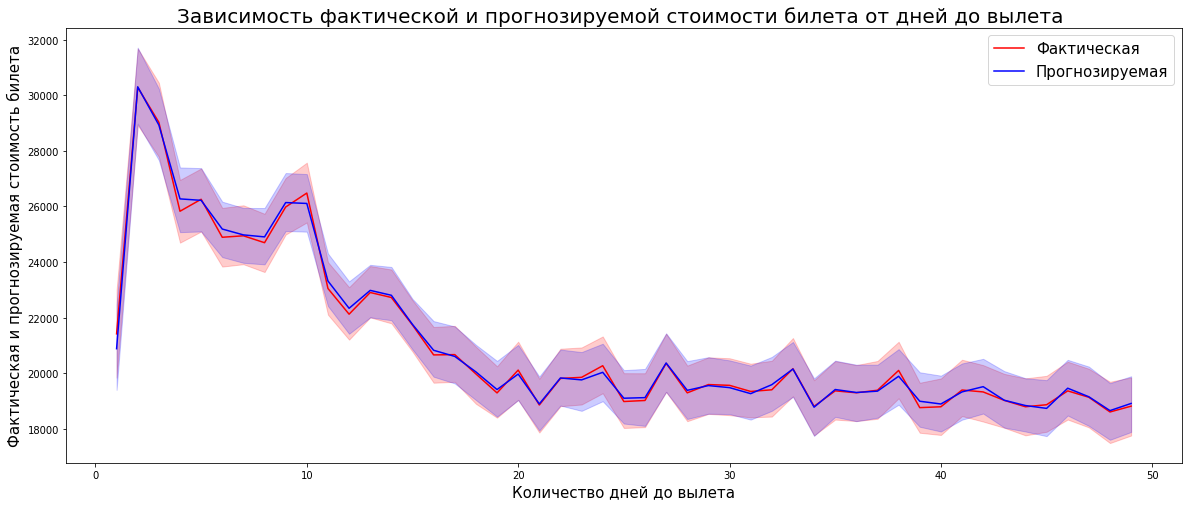

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Зависимость фактической и прогнозируемой стоимости билета от дней до вылета ',fontsize=20)
plt.legend(labels=['Фактическая','Прогнозируемая'],fontsize=15)
plt.xlabel('Количество дней до вылета',fontsize=15)
plt.ylabel('Фактическая и прогнозируемая стоимость билета',fontsize=15)
plt.show()

На графике видно почти полное совпадение кривых фактической и прогнозируемой стоимости билета.

Ниже на графике можно посмотреть абсолютное отклонение прогнозируемой стоимости билета от фактической:

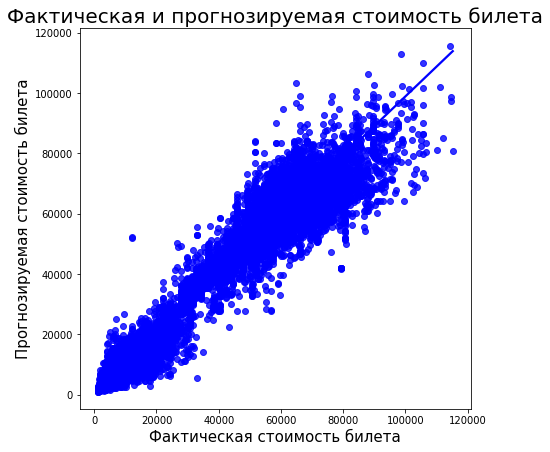

In [ ]:
plt.figure(figsize=(7,7))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='blue')
plt.title('Фактическая и прогнозируемая стоимость билета',fontsize=20)
plt.xlabel('Фактическая стоимость билета',fontsize=15)
plt.ylabel('Прогнозируемая стоимость билета',fontsize=15)
plt.show()

# LightGBM

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb
# создаем набор данных для light gbm
lgb_train = lgb.Dataset(x_train,y_train)
lgb_test = lgb.Dataset(x_test,y_test, reference=lgb_train)

# указываем параметры
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': {'l2', 'l1'},
          'num_leaves': 31,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.8,
          'bagging_freq': 5,
          'verbose': 0}

# Обучение модели
print('Обучение модели...')
LGBM = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_test,
                early_stopping_rounds=5)

print('Сохраняем модель...')
# сохраняем модель в файл
LGBM.save_model('model_lgbm.txt')

print('Начинаем прогнозировать...')
# Прогнозирование модели на тестовых данных
y_pred = LGBM.predict(x_test, num_iteration=LGBM.best_iteration)
# eval
# print('The rmse of prediction is:', mean_squared_error(y_validation_1, y_pred_3) ** 0.5)

Обучение модели...
[1]	valid_0's l2: 4.66984e+08	valid_0's l1: 18781.8
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 4.23825e+08	valid_0's l1: 17850.2
[3]	valid_0's l2: 3.84975e+08	valid_0's l1: 16964.9
[4]	valid_0's l2: 3.4977e+08	valid_0's l1: 16126.5
[5]	valid_0's l2: 3.18142e+08	valid_0's l1: 15334.5
[6]	valid_0's l2: 2.89403e+08	valid_0's l1: 14582.4
[7]	valid_0's l2: 2.63444e+08	valid_0's l1: 13865.9
[8]	valid_0's l2: 2.39979e+08	valid_0's l1: 13186.8
[9]	valid_0's l2: 2.18823e+08	valid_0's l1: 12546.8
[10]	valid_0's l2: 1.99645e+08	valid_0's l1: 11938.2
[11]	valid_0's l2: 1.8233e+08	valid_0's l1: 11361.2
[12]	valid_0's l2: 1.66655e+08	valid_0's l1: 10816.3
[13]	valid_0's l2: 1.52554e+08	valid_0's l1: 10300.6
[14]	valid_0's l2: 1.39791e+08	valid_0's l1: 9812.78
[15]	valid_0's l2: 1.28294e+08	valid_0's l1: 9353.21
[16]	valid_0's l2: 1.17868e+08	valid_0's l1: 8916.83
[17]	valid_0's l2: 1.08488e+08	valid_0's l1: 8507.47
[18]	valid_0's l2: 1.00013e+08

Оценочные показатели:

In [ ]:
    # Оценочные показатели
    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Функция для вычисления MAPE - cредняя абсолютная ошибка в процентах
    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Вычисляем MAPE
    res_mape = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(res_mape, 2), '%')
    
    # Вычисляем Adjusted R squared - скорректированный R-квадрат
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')

Mean Absolute Error (MAE): 2312.715
Mean Squared Error (MSE): 15011744.205
Root Mean Squared Error (RMSE): 3874.499
R2_score: 0.970832
Root Mean Squared Log Error (RMSLE): 8.262
Mean Absolute Percentage Error (MAPE): 20.19 %
Adj R Square:  0.970831
------------------------------------------------------------------------------------------------------------


Строим график сравнения фактической и прогнозируемой стоимости билета

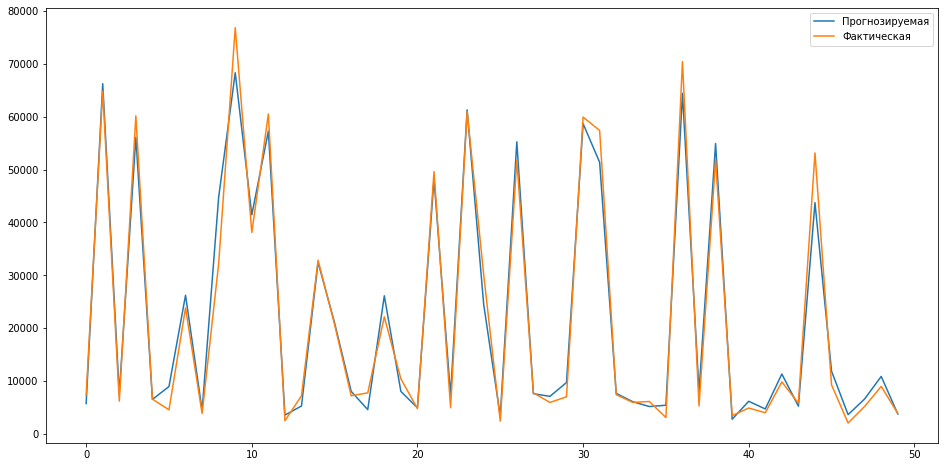

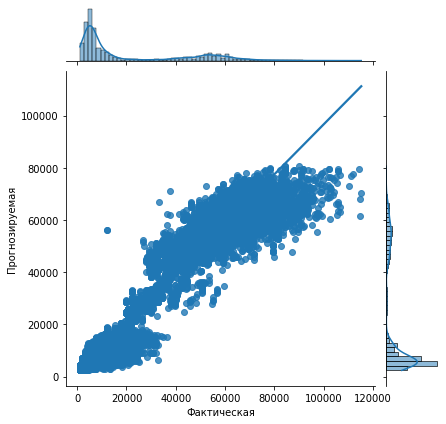

In [ ]:
test = pd.DataFrame({'Прогнозируемая':y_pred,'Фактическая':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Прогнозируемая','Фактическая'])
sns.jointplot(x='Фактическая',y='Прогнозируемая',data=test,kind='reg',);

Добавляем оценочные показатели модели LightGBM в общую таблицу сравнения моделей:

In [ ]:
new_row = {'Model Name' : "LightGBM",
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : res_mape,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
Results = Results.append(new_row, ignore_index=True)

In [ ]:
# создаем список имен моделей
models=['LinearRegression','DecisionTreeRegressor','BaggingRegressor','RandomForestRegressor','KNeighborsRegressor',
        'ExtraTreesRegressor','Ridge Regression','Lasso Regression','GradientBoostingRegressor','XGBRegressor', 'CatBoostRegressor', 'LightGBM']
# создаем датафрейм на основе списка и добаляем в него столбцы метрик
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
# сортируем данные по признаку Adj_R_Square 
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.984823,1143.837615,2794.702253,7.618108,7.810361e+06,7.935481,0.984824
1,RandomForestRegressor,0.983989,1171.705114,2870.515043,7.910286,8.239857e+06,7.962247,0.983990
2,BaggingRegressor,0.982795,1206.027484,2975.592552,8.229497,8.854151e+06,7.998198,0.982796
3,CatBoostRegressor,0.978491,1821.073723,3327.053803,14.152182,1.106929e+07,8.109842,0.978492
4,DecisionTreeRegressor,0.972992,1267.827397,3728.191189,8.605616,1.389941e+07,8.223678,0.972993
5,KNeighborsRegressor,0.971657,1853.746812,3819.270820,11.109409,1.458683e+07,8.247815,0.971658
6,LightGBM,0.970831,2312.714785,3874.499220,20.188828,1.501174e+07,8.262172,0.970832
7,GradientBoostingRegressor,0.956823,2808.069729,4713.929945,20.673000,2.222114e+07,8.458277,0.956824
8,XGBRegressor,0.956812,2807.156262,4714.518249,20.667641,2.222668e+07,8.458402,0.956813
9,LinearRegression,0.904653,4630.295614,7005.015436,43.888567,4.907024e+07,8.854382,0.904656


Из таблицы видно, что модель LightGBM заняло седьмое место.
<br> Лучшей моделью в итоге является **ExtraTreesRegressor**

# Итоги

В данном блокноте было произведено: 
1. Исследование данных и получен ответ на следующие вопросы:
* Изменятся ли цена в зависимости от авиакомпании?
* Как влияет на цену покупка билетов всего за 1-2 дня до вылета?
* Изменяется ли цена билета в зависимости от времени отправления и прибытия?
* Как меняется цена при изменении источника и пункта назначения?
* Как меняется цена билета в экономическом и бизнес-классе?

2. Подготовка данных для машинного обучения:
* Удаление дубликатов
* Преобразование категориальных признаков в числовые
3. Создание и обучение 11 моделей на основе:
* LinearRegression
* DecisionTreeRegressor
* BaggingRegressor
* RandomForestRegressor
* KNeighborsRegressor
* ExtraTreesRegressor
* Ridge Regression
* Lasso Regression
* GradientBoostingRegressor
* XGBRegressor
* CatBoostRegressor
* LightGBM
4. Определение лучшей модели **ExtraTreesRegressor** на основе сравнения метрик качества моделей.
5. Прогнозирование стоимости авиабилетов лучшей моделью **ExtraTreesRegressor** на новых данных.
